In [ ]:
'''
+------------------+--------------------------------------------------------------+
│ Column Name      │ Description                                                  │
│------------------│--------------------------------------------------------------│
+------------------+--------------------------------------------------------------+
│ Year             | Reference Year                                               |
| Month            | Reference Month                                              │
│ GEO*              │ Geographic region (encoded as Province 1, Province 2, etc.)  │
│ Products*         │ Name of the retail product                                   │
│ COORDINATE*       │ Internal coordinate identifier for product                   │
│ VALUE            │ Original product price per unit (before tax)                 │
│ UOM*              │ Unit of measure (e.g., Dollars)                              │
│ Taxable          │ 'Yes' if the product is subject to tax, 'No' otherwise       │
│ Total tax rate   │ Total tax rate (%) based on province or average for 'Canada' │
│ Value after tax  │ Price after tax if taxable, else same as VALUE               │
│ Product Category* │ High-level category assigned to the product                  │
│ Essential*        │ 'Essential' for basic needs or 'Non-Essential'               │
+------------------+--------------------------------------------------------------+
'''

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = 'data\\Retail_Prices_of _Products.csv'

In [ ]:
data= pd.read_csv(DATA_PATH)
# data

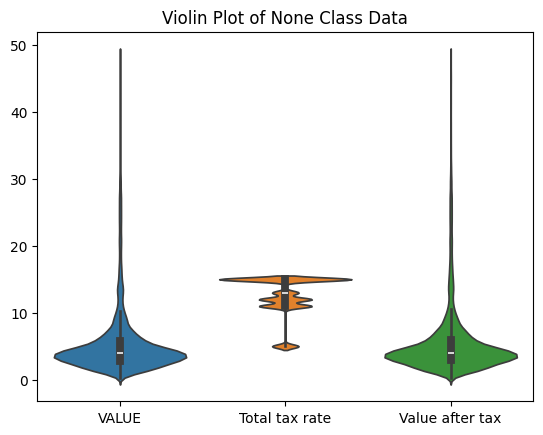

In [13]:
#반응 변수는 Value after tax으로 하고, 다른것들중에 설명변수
#각 품목을 기준으로, 시간대별 정렬. 그다음에 분석
none_class_data=data[["VALUE","Total tax rate","Value after tax"]]

sns.violinplot(data=none_class_data)
plt.title("Violin Plot of None Class Data")
plt.show()


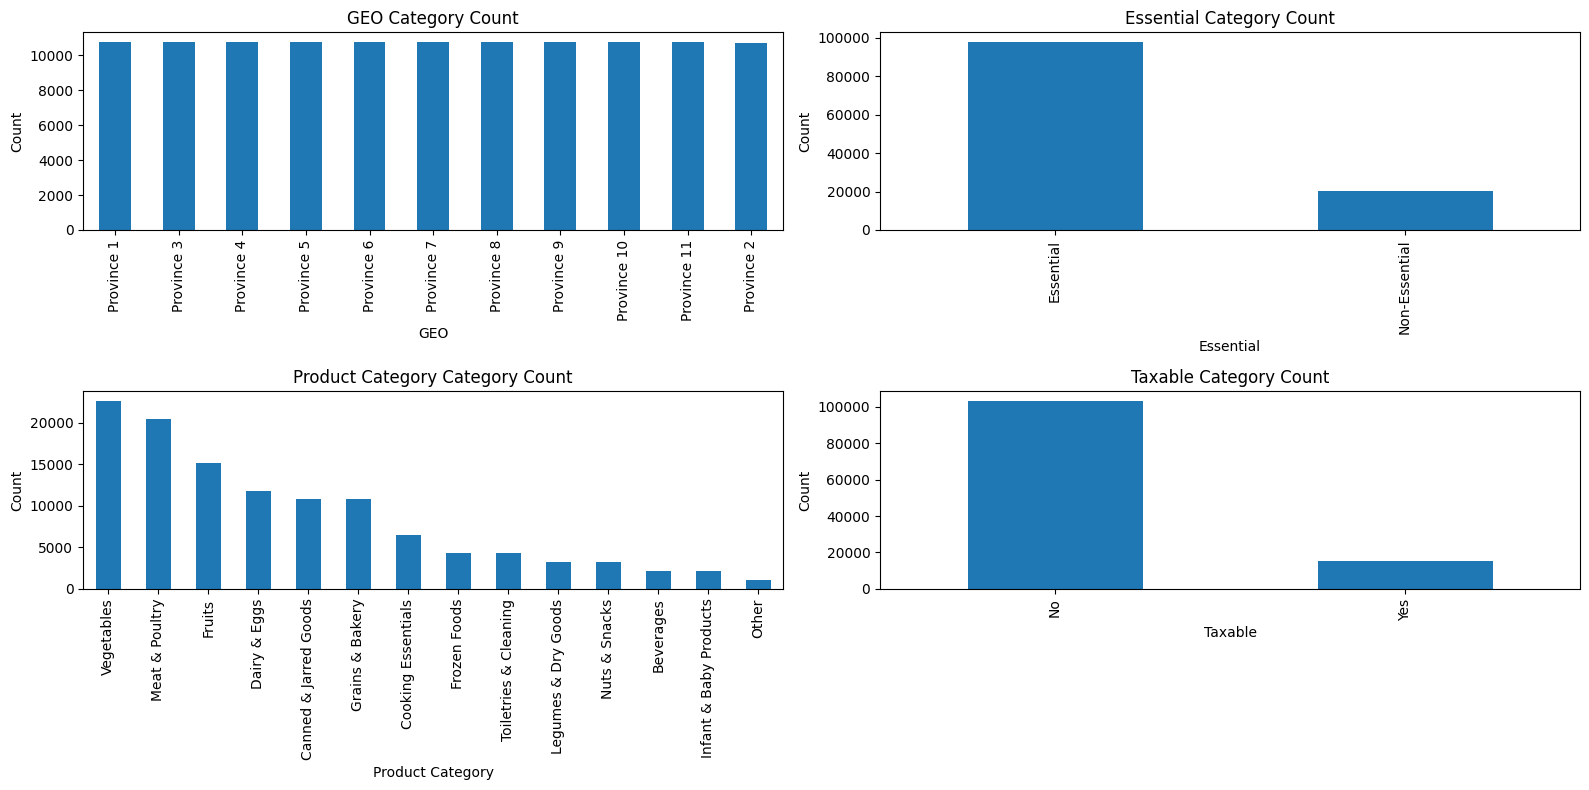

In [18]:
#범주형들의 비율 그림
categorical_columns = ["GEO", "COORDINATE", "Products", "Essential", "Product Category", "UOM", "Taxable"]
# categorical_columns = ["GEO","Essential", "Product Category", "Taxable"]

class_data=data[categorical_columns].copy()


# 각 범주형 데이터에 대해 막대그래프 그리기
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    class_data[column].value_counts().plot(kind='bar')
    plt.title(f'{column} Category Count')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

In [8]:
#각 변수별 기본 통계랑. 평균, 분산. 범주형의 경우, 범주별 비율


0         12.66
1         21.94
2         13.44
3         20.17
4          9.12
          ...  
118477     4.50
118478     9.04
118479     4.63
118480     8.04
118481    14.77
Name: Value after tax, Length: 118482, dtype: float64

In [ ]:
#설명변수와 반응변수간의 산점도

In [ ]:
#데이터 전처리
#년도와 월을 합쳐서 시계열 데이터로 변환


